In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math
import re
import plotly.express as px
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
        
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Pallete
# Props to @sergiosaharovskiy

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [100]:
df.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [101]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols = 'Type'
cat_columns = ['Type']

In [102]:
c = ['#90A6B1', '#037d97']

g = sns.pairplot(data=df, x_vars=num_cols, y_vars=num_cols, hue=target_col, corner=True, palette=c)

g._legend.set_bbox_to_anchor((0.8, 0.7))
g._legend.set_title(target_col)
g._legend.loc = 'upper center'
g._legend.get_title().set_fontsize(14)
for item in g._legend.get_texts():
    item.set_fontsize(14)

plt.suptitle(f'Scatter Matrix with Target\n\n', ha='center', fontweight='bold', fontsize=25, y=0.98)
plt.show()

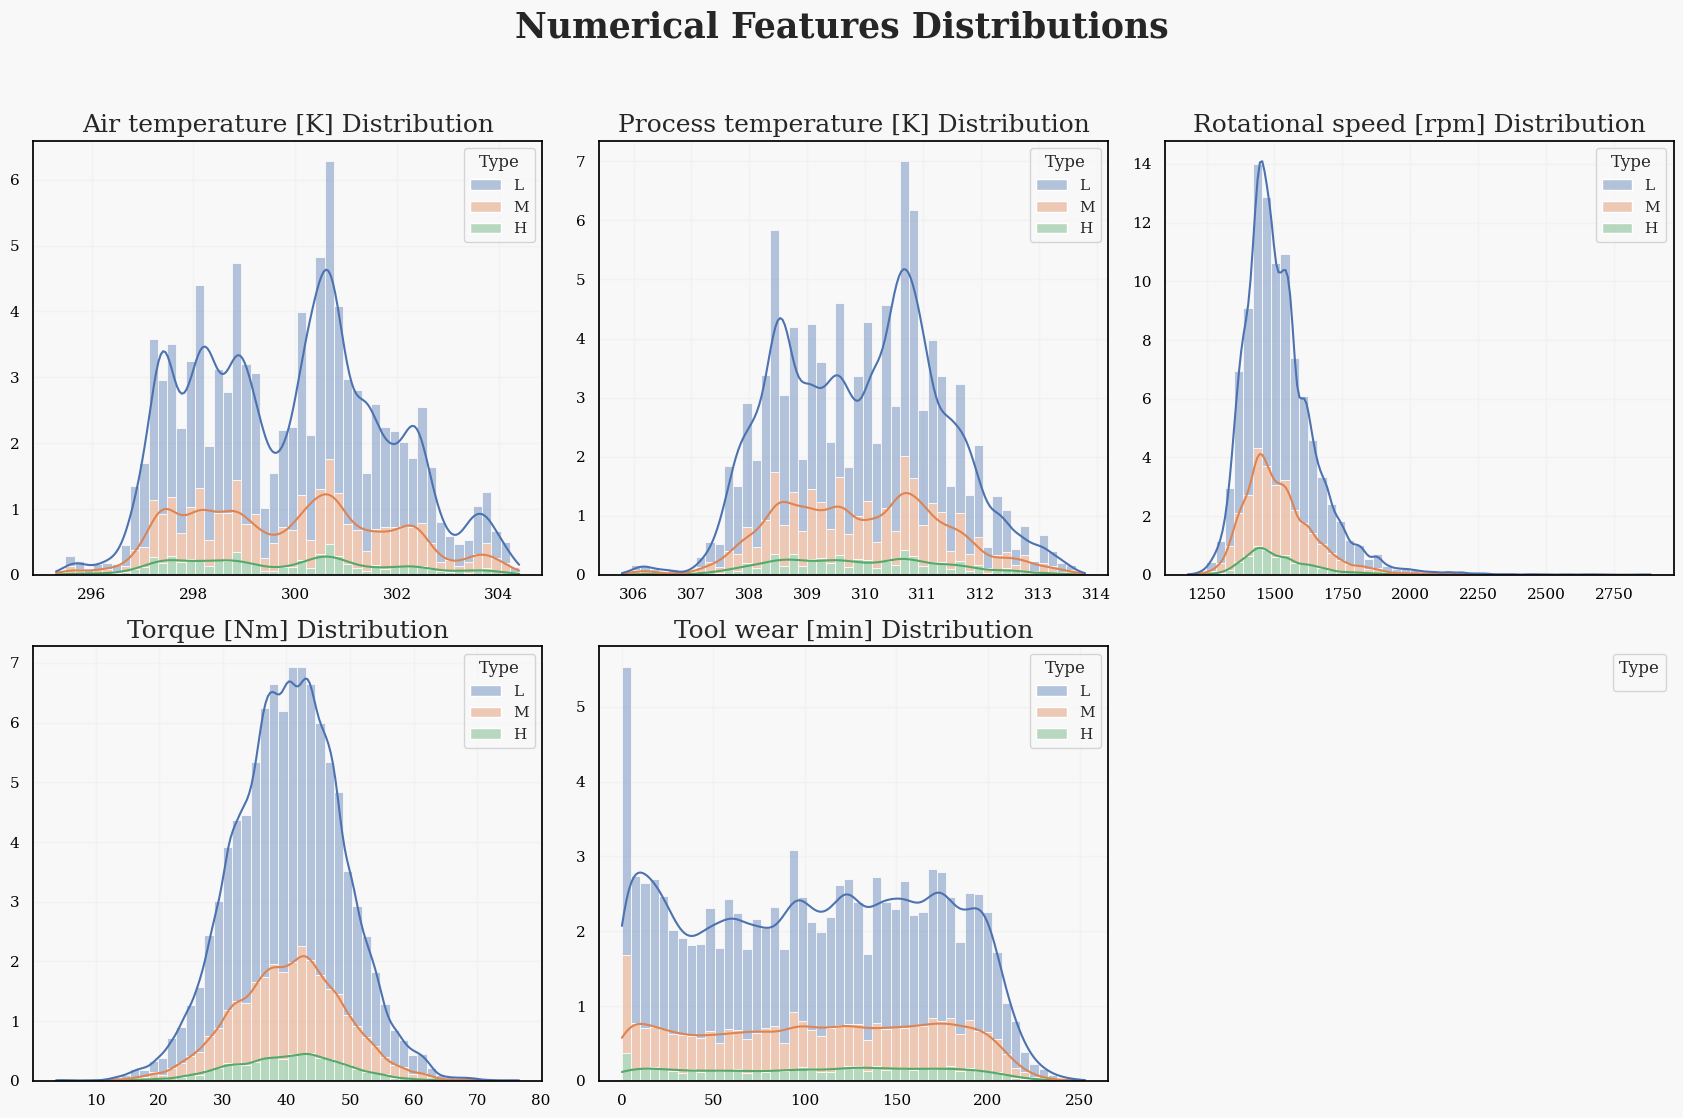

In [ ]:
features = [f for f in df.columns if f in num_cols]
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.4,
    'stat': 'percent',
    'bins': n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 12))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]

    sns.histplot(
        df,
        x=column,
        hue=cat_cols,
        multiple="stack",
        ax=ax[i],
        color=palette[1],
        **histplot_hyperparams
    )
        
    for artist in plot_axes[0].artists:
        if isinstance(artist, sns.kdeplot):
            artist.remove()

    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)  
    ax[i].set_ylabel(None, fontsize=16)
    
handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, title=cat_cols)

for i in range(i + 1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Features Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
plt.tight_layout()
plt.show()

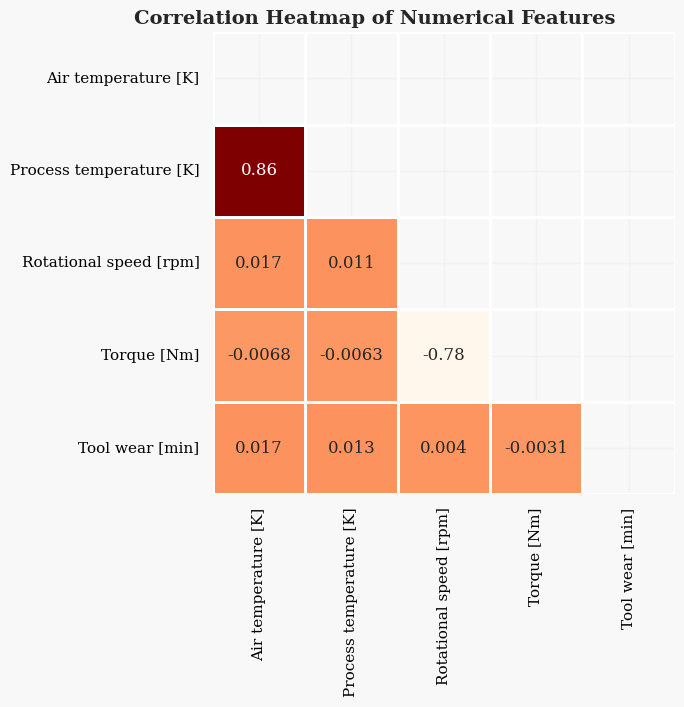

In [ ]:
corr_matrix = df[num_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, cmap='OrRd', cbar=False, linewidths=1)
title = heatmap.set_title("Correlation Heatmap of Numerical Features", weight='bold', size=14)
title.set_position([0.35, 1.05])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\2574865051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax[i], palette=d)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\2574865051.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, ax=ax[i], palette=d)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\2574865051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax[i], palette=d)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\2574865051.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.coun

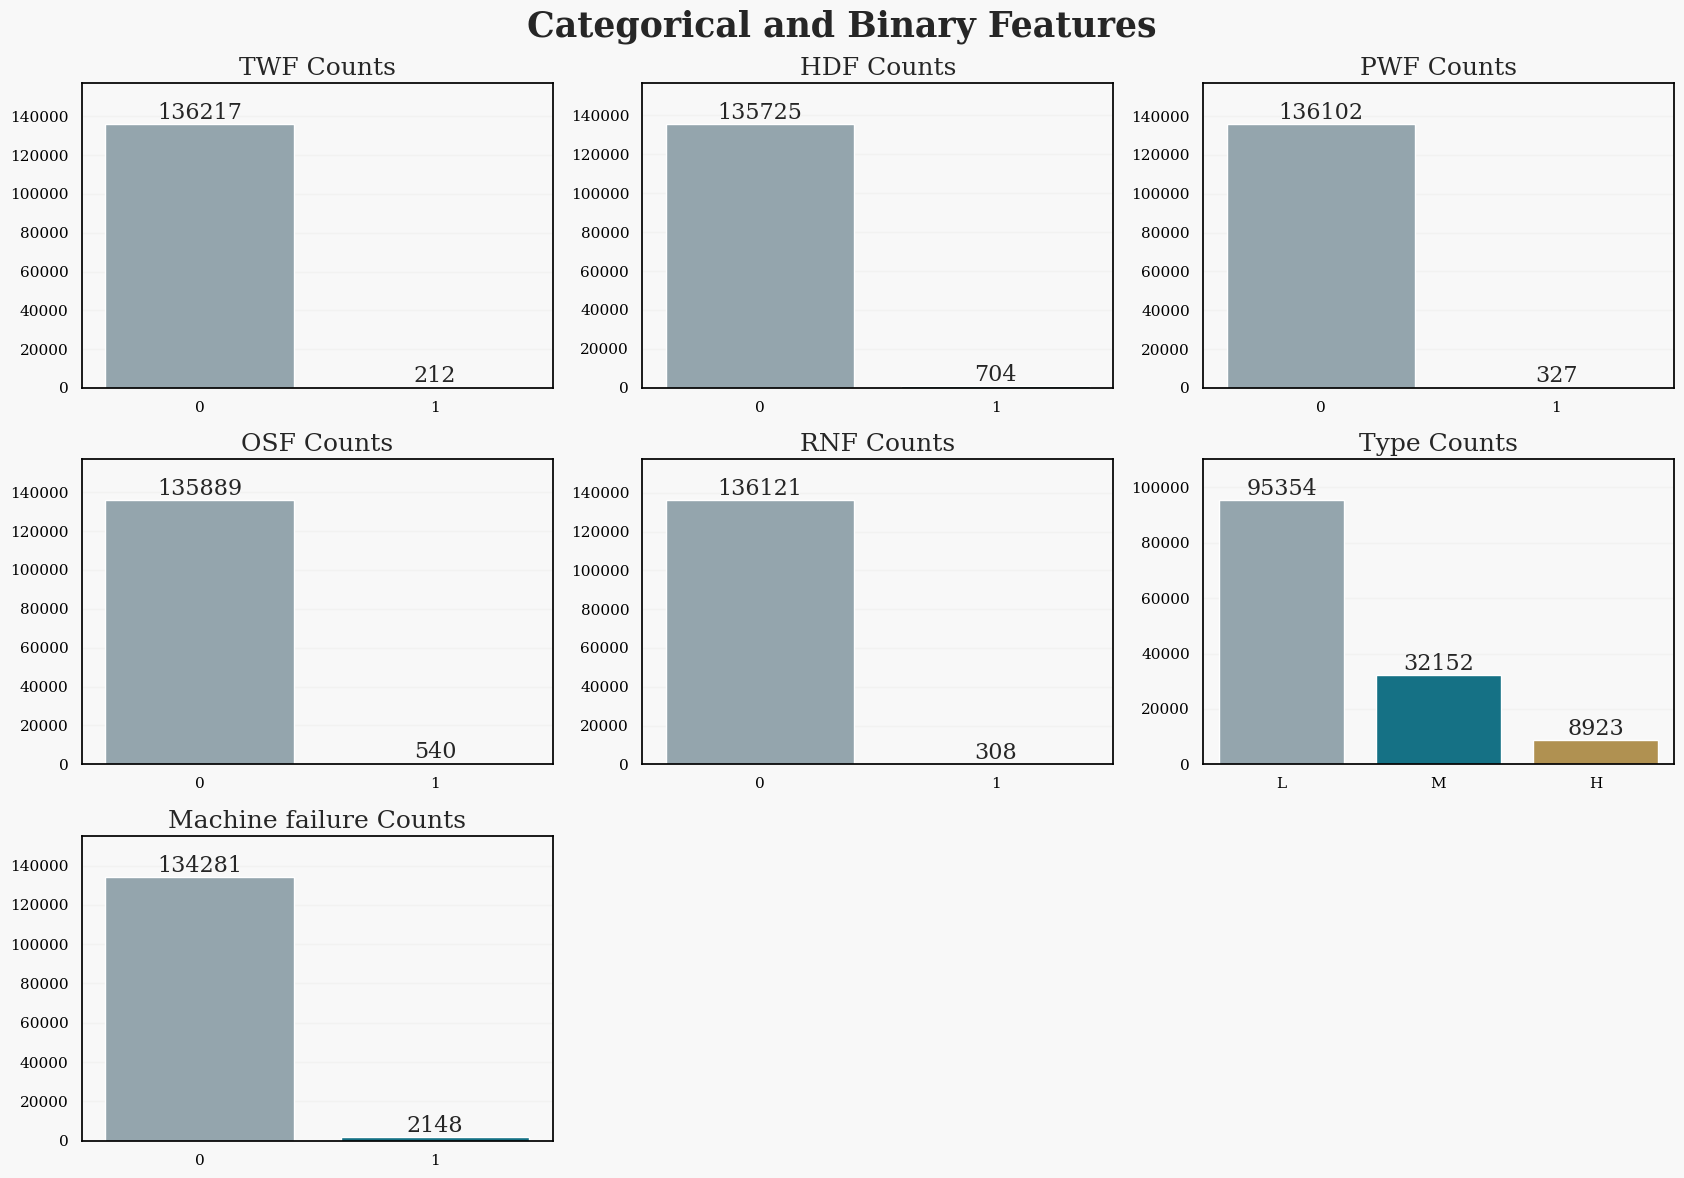

In [ ]:
d = ['#90A6B1', '#037d97', '#C09741']

columns = binary_cols + [cat_cols, target_col]
n_cols = 3
n_rows = (len(columns) - 1) // n_cols + 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=ax[i], palette=d)
    
    # Titles
    ax[i].set_title(f'{column} Counts', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)
    ax[i].set_ylabel(None, fontsize=16)

    ax[i].tick_params(axis='x', rotation=0)

    for p in ax[i].patches:
        value = int(p.get_height())
        ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=16)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)

for i in range(len(columns), len(ax)):
    ax[i].axis('off')

fig.suptitle('Categorical and Binary Features', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

filtered_df

df.drop(columns='RNF', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12632\457641587.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\457641587.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\457641587.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\457641587.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\457641587.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intend

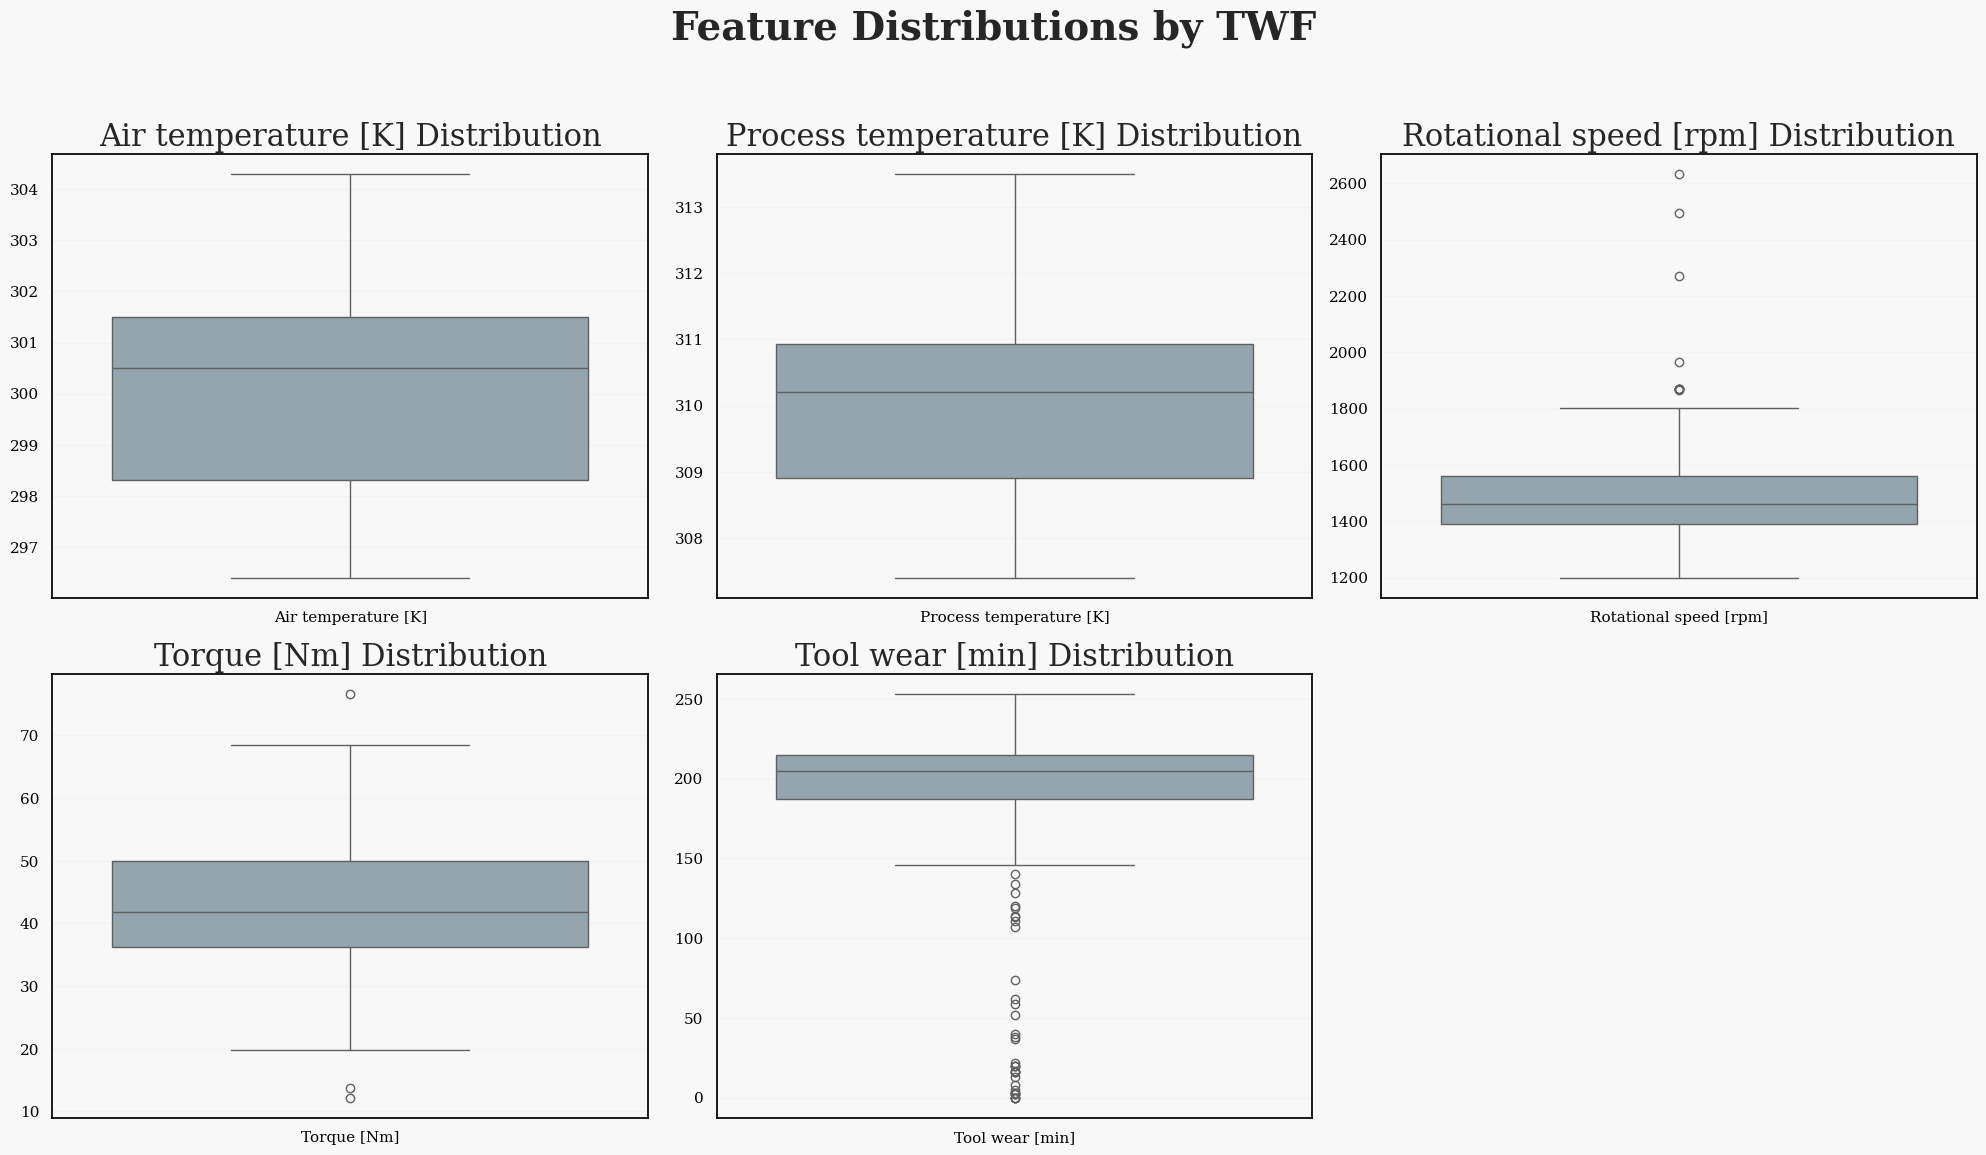

In [ ]:
features = [f for f in df.columns if f in num_cols]
columns = features
n_rows = len(columns) // 3
if len(columns) % 3:
    n_rows += 1

fig, ax = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
ax = ax.ravel()

unique_target = df['TWF'].unique()
n_categories = len(unique_target)
colors = sns.color_palette(c, n_categories)

for i, column in enumerate(columns):
    data = [df[df['TWF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i], palette=colors)
  
    ax[i].set_title(f'{column} Distribution', fontsize=22)
    ax[i].set_xlabel(None, fontsize=18)
    ax[i].set_ylabel(None, fontsize=18)

for i in range(len(columns), len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Feature Distributions by TWF\n\n', ha='center', fontweight='bold', fontsize=28, y=0.96)
plt.tight_layout(pad=1.0)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\774595130.py:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=df[df['TWF'] == 1], x='Tool wear [min]', y='temp_ratio', hue='Type',
C:\Users\user\AppData\Local\Temp\ipykernel_12632\774595130.py:25: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=df[(df['TWF'] == 0) & ((df['HDF'] == 1))], x='Tool wear [min]', y='temp_ratio', hue='Type',


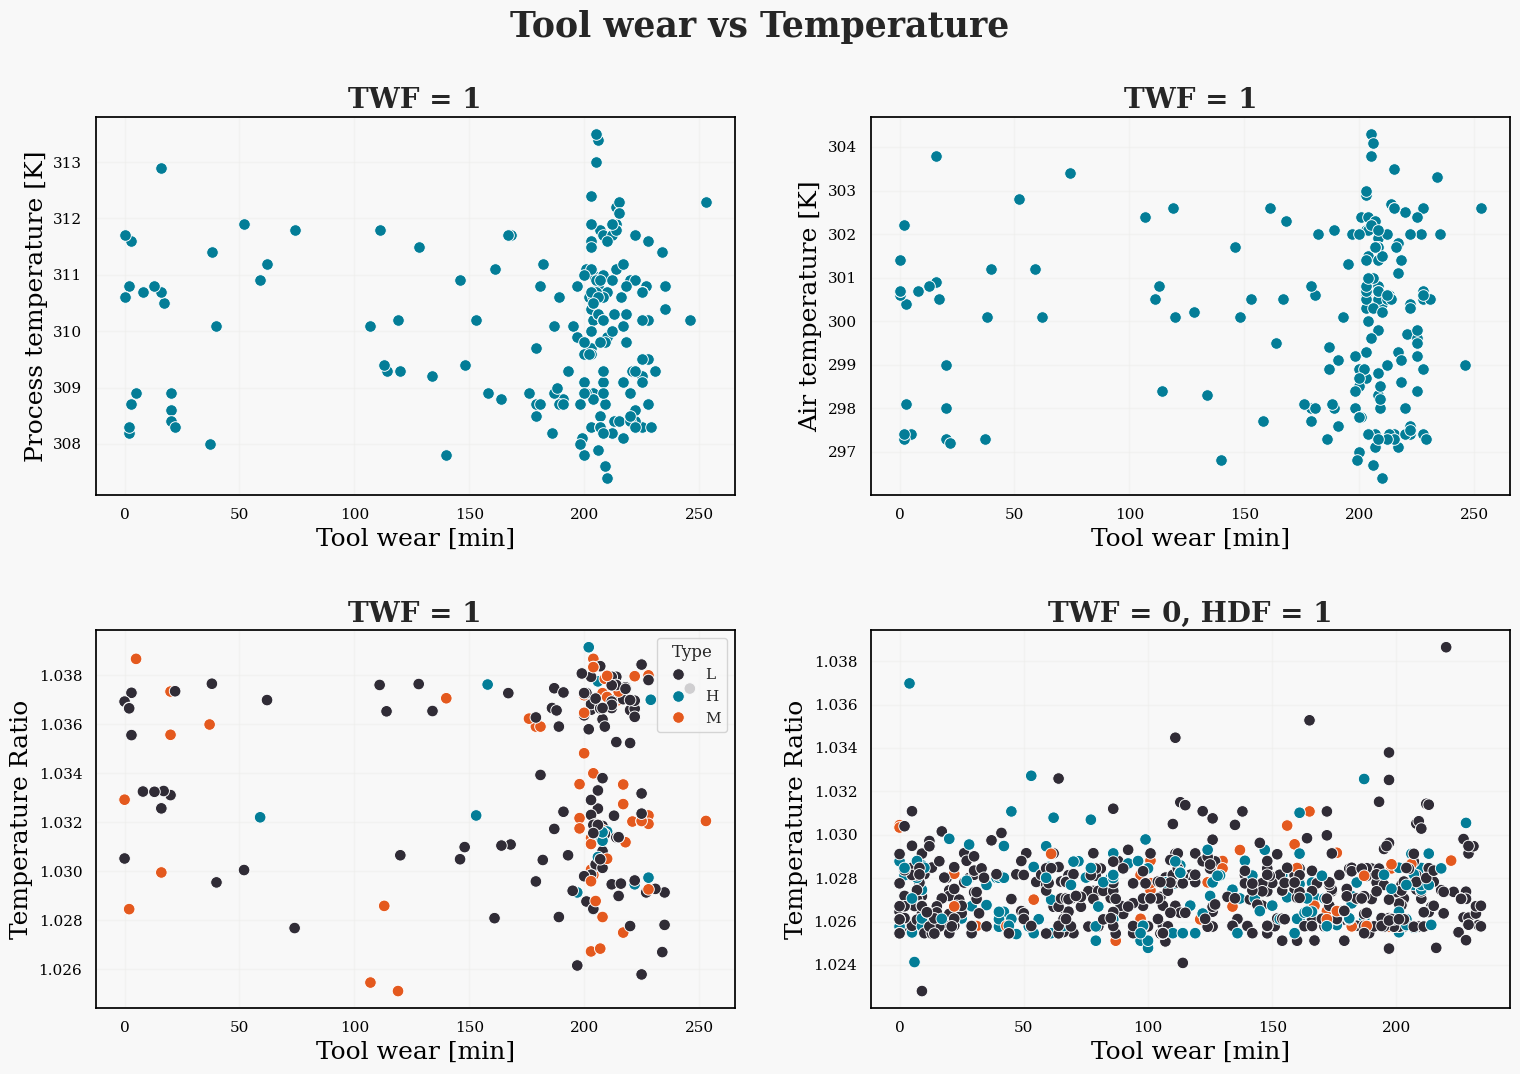

In [ ]:
df['tool_process'] = df['Tool wear [min]'] * df['Process temperature [K]']
df['tool_air'] = df['Tool wear [min]'] * df['Air temperature [K]']
df['temp_ratio'] = df['Process temperature [K]'] / df['Air temperature [K]']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df[df['TWF'] == 1], x='Tool wear [min]', y='Process temperature [K]',
                color='#037d97', ax=axes[0, 0], s=70, antialiased=True)
axes[0, 0].set_title('TWF = 1', fontsize=20, fontweight='bold')
axes[0, 0].set_xlabel('Tool wear [min]', fontsize=18)
axes[0, 0].set_ylabel('Process temperature [K]', fontsize=18)

sns.scatterplot(data=df[df['TWF'] == 1], x='Tool wear [min]', y='Air temperature [K]',
                color='#037d97', ax=axes[0, 1], s=70, antialiased=True)
axes[0, 1].set_title('TWF = 1', fontsize=20, fontweight='bold')
axes[0, 1].set_xlabel('Tool wear [min]', fontsize=18)
axes[0, 1].set_ylabel('Air temperature [K]', fontsize=18)

sns.scatterplot(data=df[df['TWF'] == 1], x='Tool wear [min]', y='temp_ratio', hue='Type',
                palette=palette, ax=axes[1, 0], s=70, antialiased=True)
axes[1, 0].set_title('TWF = 1', fontsize=20, fontweight='bold')
axes[1, 0].set_xlabel('Tool wear [min]', fontsize=18)
axes[1, 0].set_ylabel('Temperature Ratio', fontsize=18)

sns.scatterplot(data=df[(df['TWF'] == 0) & ((df['HDF'] == 1))], x='Tool wear [min]', y='temp_ratio', hue='Type',
                palette=palette, ax=axes[1, 1], s=70, antialiased=True, legend=False)
axes[1, 1].set_title('TWF = 0, HDF = 1', fontsize=20, fontweight='bold')
axes[1, 1].set_xlabel('Tool wear [min]', fontsize=18)
axes[1, 1].set_ylabel('Temperature Ratio', fontsize=18)

fig.suptitle(f'Tool wear vs Temperature\n', ha='center',
             fontweight='bold', fontsize=25, y=0.92)

plt.tight_layout(pad=3)
plt.show()

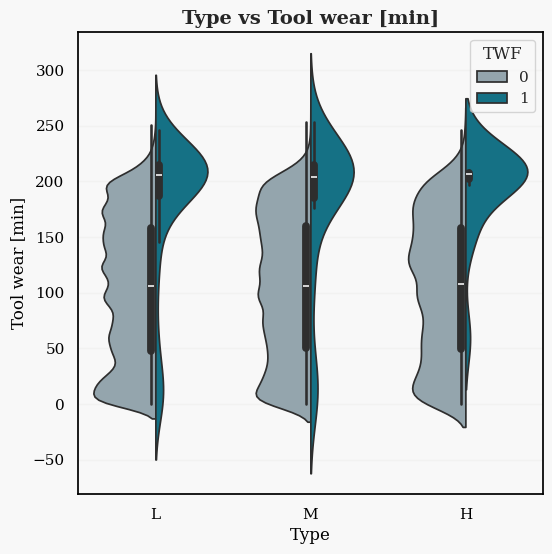

ANOVA Test Results:
F-statistic: 3.3949164578041544
p-value: 0.03354619015995314

There is evidence of a significant difference in the means of 'Tool wear [min]' across different values of 'Type'.

Levene's Test Results:
Test statistic: 8.15951222197882
p-value: 0.00028614146175158137

There is evidence of a significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.


In [ ]:
import scipy.stats as stats

df_twf = df[['Type', 'Tool wear [min]', 'TWF']]

plt.figure(figsize=(6, 6))
sns.violinplot(data=df_twf, x='Type', y='Tool wear [min]', hue='TWF', split=True, palette=c)
plt.title('Type vs Tool wear [min]', fontsize=14, fontweight='bold')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Tool wear [min]', fontsize=12)
plt.legend(title='TWF', loc='upper right')
plt.show()

# one-way ANOVA test
result_anova = stats.f_oneway(*(df_twf[df_twf['Type'] == t]['Tool wear [min]'] for t in df_twf['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Tool wear [min]' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Tool wear [min]' across different values of 'Type'.")
print()

# Levene's test
result_levene = stats.levene(*(df_twf[df_twf['Type'] == t]['Tool wear [min]'] for t in df_twf['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.")

C:\Users\user\AppData\Local\Temp\ipykernel_12632\877653478.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\877653478.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\877653478.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\877653478.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\877653478.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intend

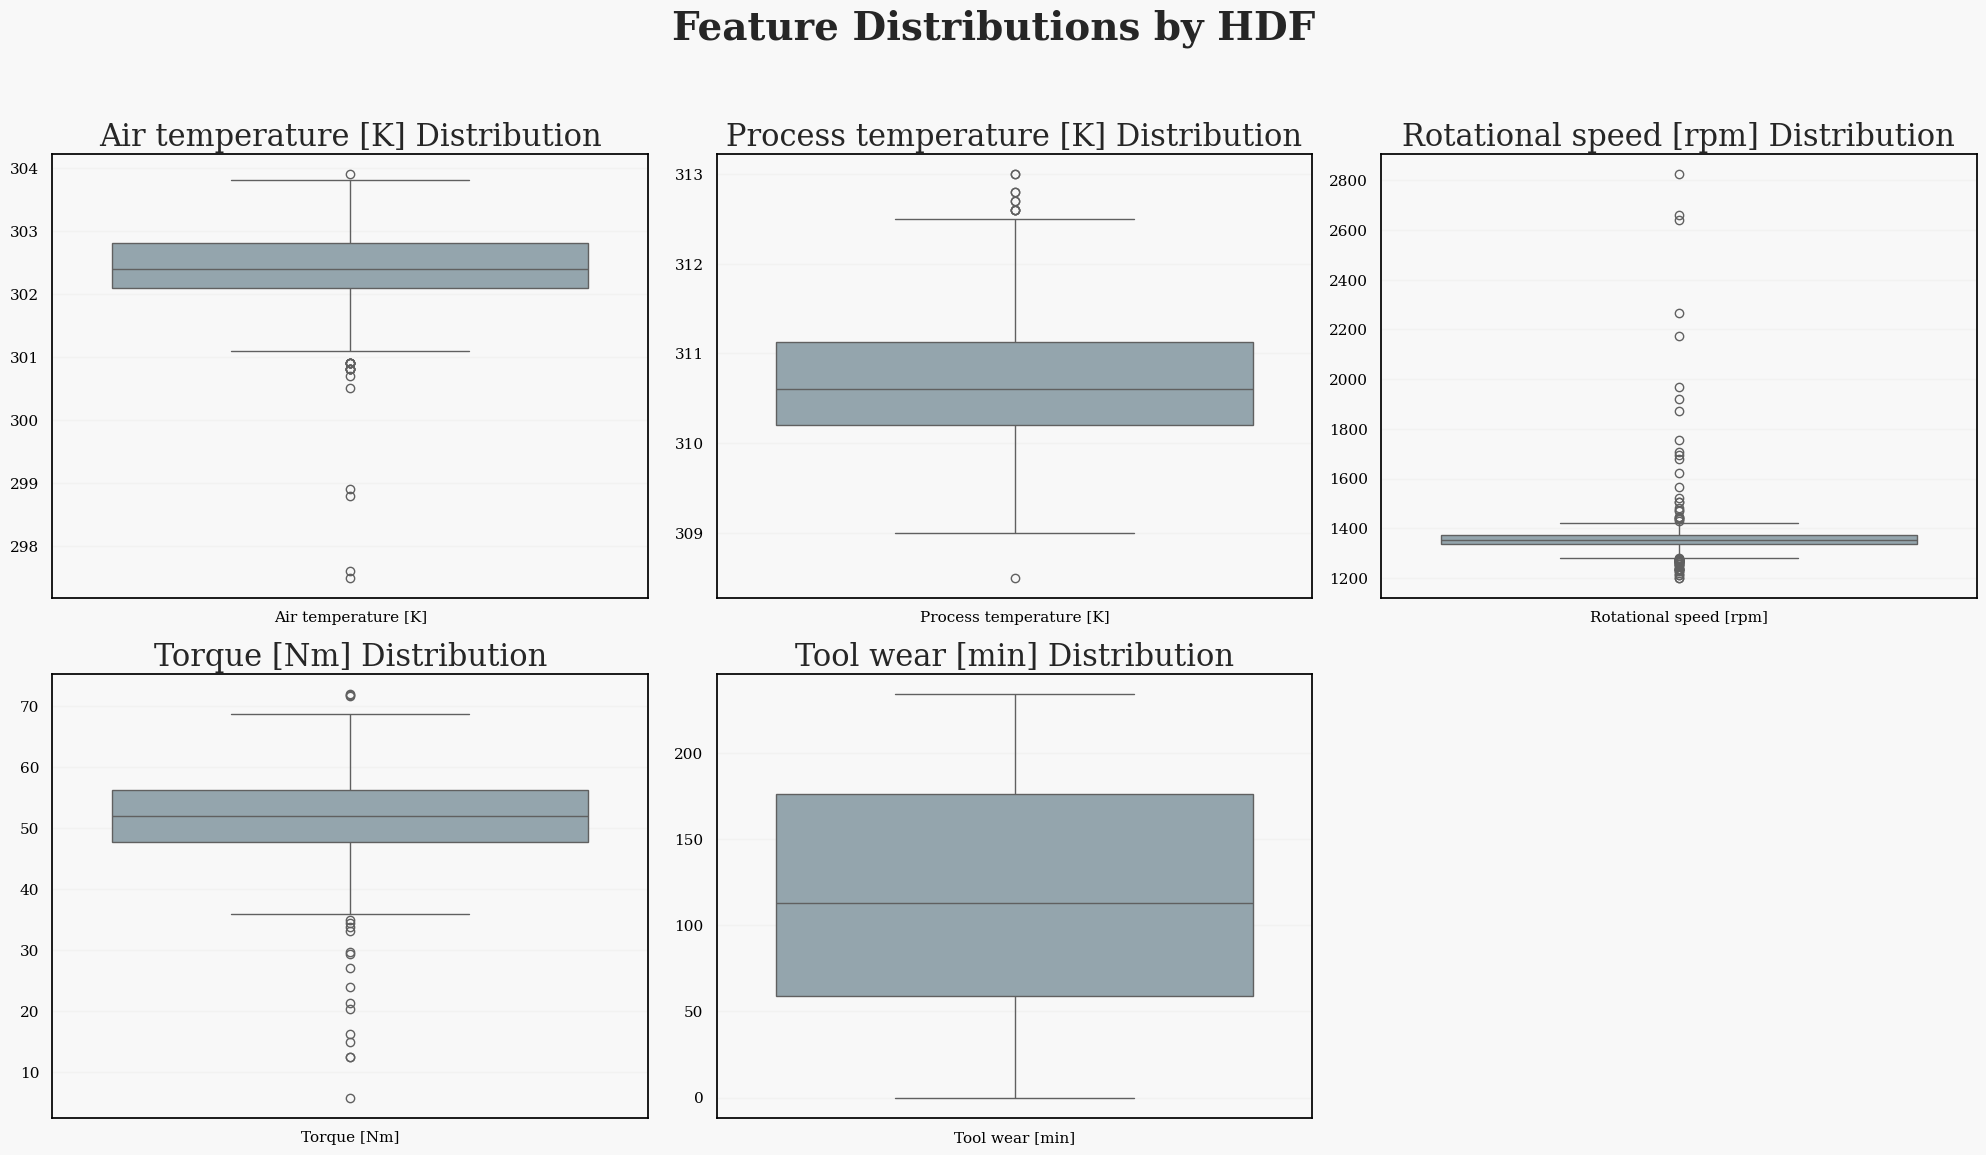

In [ ]:
features = [f for f in df.columns if f in num_cols]
columns = features
n_rows = len(columns) // 3
if len(columns) % 3:
    n_rows += 1

fig, ax = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
ax = ax.ravel()

unique_target = df['HDF'].unique()
n_categories = len(unique_target)
colors = sns.color_palette(c, n_categories)

for i, column in enumerate(columns):
    data = [df[df['HDF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i], palette=colors)
  
    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=22)
    ax[i].set_xlabel(None, fontsize=16)
    ax[i].set_ylabel(None, fontsize=16)

for i in range(len(columns), len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Feature Distributions by HDF\n\n', ha='center', fontweight='bold', fontsize=28, y=0.96)
plt.tight_layout(pad=1.0)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\1147721502.py:23: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=df[(df['air_process_diff'] < 8.6) & (df['HDF'] == 1)], x='Air temperature [K]', y='Process temperature [K]',


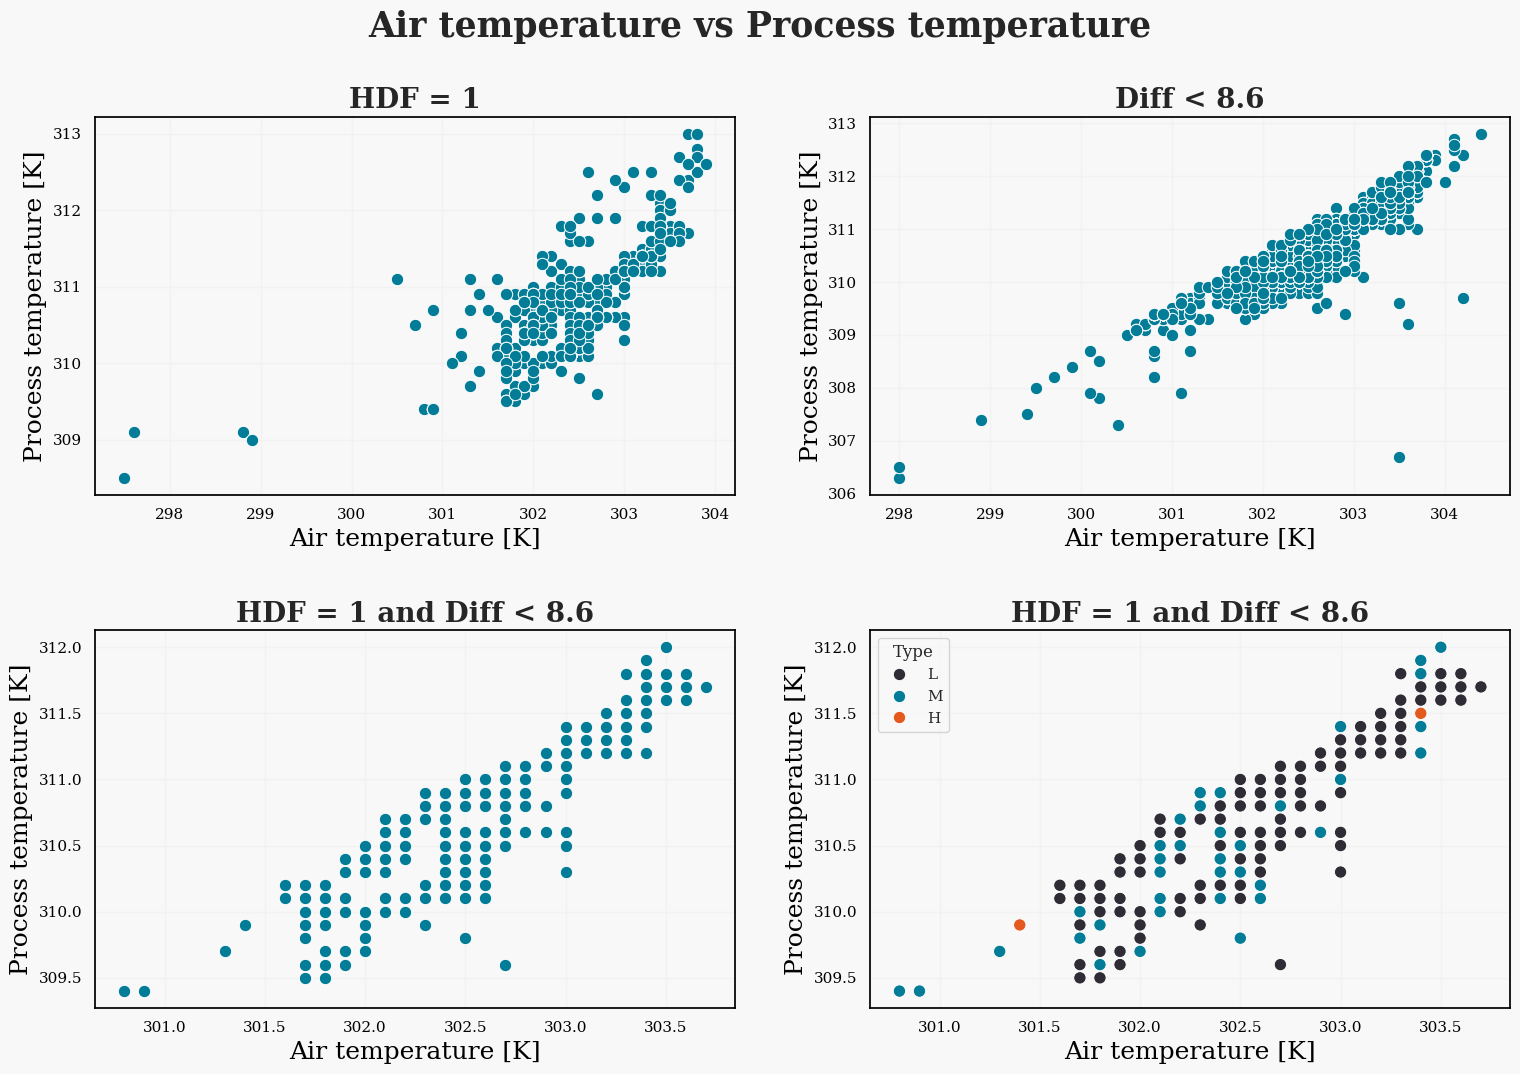

In [ ]:
df['air_process_diff'] = abs(df['Air temperature [K]'] - df['Process temperature [K]'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df[df['HDF'] == 1], x='Air temperature [K]', y='Process temperature [K]',
                color='#037d97', ax=axes[0, 0], s=80)
axes[0, 0].set_title('HDF = 1', fontsize=20, fontweight='bold')
axes[0, 0].set_xlabel('Air temperature [K]', fontsize=18)
axes[0, 0].set_ylabel('Process temperature [K]', fontsize=18)

sns.scatterplot(data=df[df['air_process_diff'] < 8.6], x='Air temperature [K]', y='Process temperature [K]',
                color='#037d97', ax=axes[0, 1], s=80)
axes[0, 1].set_title('Diff < 8.6', fontsize=20, fontweight='bold')
axes[0, 1].set_xlabel('Air temperature [K]', fontsize=18)
axes[0, 1].set_ylabel('Process temperature [K]', fontsize=18)

sns.scatterplot(data=df[(df['air_process_diff'] < 8.6) & (df['HDF'] == 1)], x='Air temperature [K]', y='Process temperature [K]',
                color='#037d97', ax=axes[1, 0], s=80)
axes[1, 0].set_title('HDF = 1 and Diff < 8.6', fontsize=20, fontweight='bold')
axes[1, 0].set_xlabel('Air temperature [K]', fontsize=18)
axes[1, 0].set_ylabel('Process temperature [K]', fontsize=18)

sns.scatterplot(data=df[(df['air_process_diff'] < 8.6) & (df['HDF'] == 1)], x='Air temperature [K]', y='Process temperature [K]',
                hue="Type", palette=palette, ax=axes[1, 1], s=80)
axes[1, 1].set_title('HDF = 1 and Diff < 8.6', fontsize=20, fontweight='bold')
axes[1, 1].set_xlabel('Air temperature [K]', fontsize=18)
axes[1, 1].set_ylabel('Process temperature [K]', fontsize=18)

fig.suptitle(f'Air temperature vs Process temperature\n', ha='center',
             fontweight='bold', fontsize=25, y=0.92)

plt.tight_layout(pad=3)
plt.show()

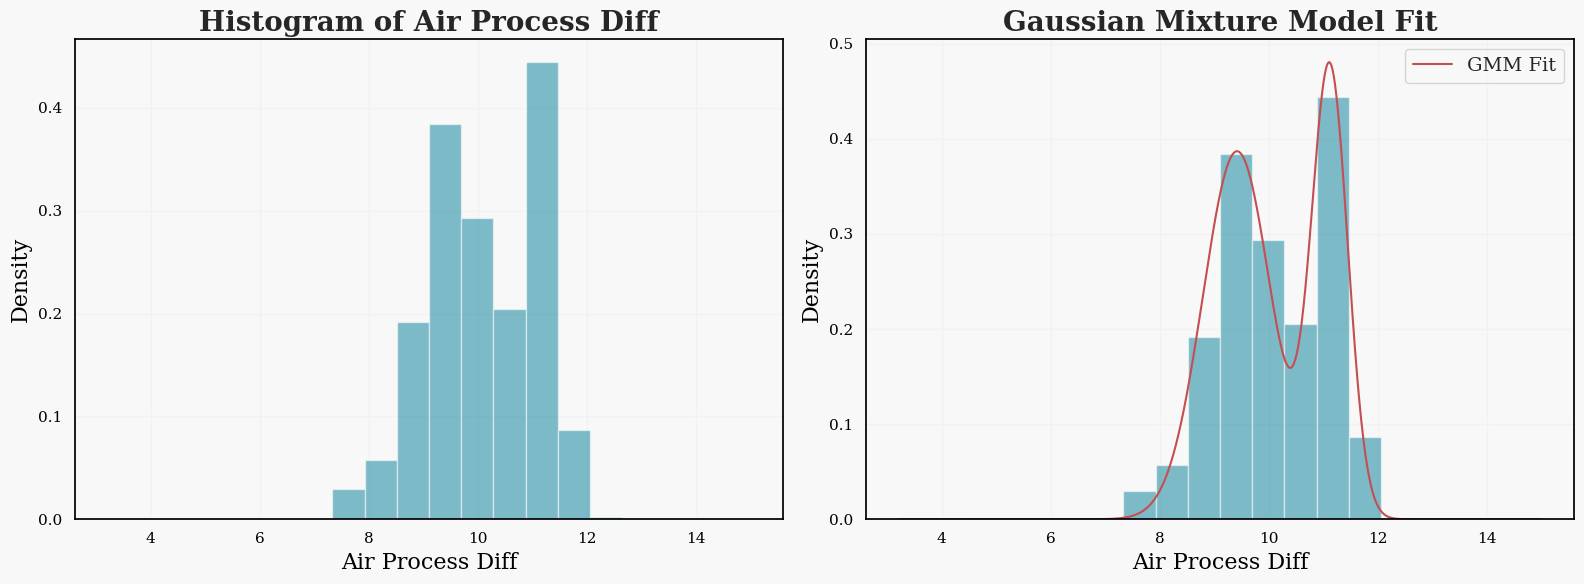

In [ ]:
from sklearn.mixture import GaussianMixture

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(data=df, x='air_process_diff', bins=20, density=True, color='#037d97', alpha=0.5)
axs[0].set_title('Histogram of Air Process Diff', fontsize=20, fontweight='bold')
axs[0].set_xlabel('Air Process Diff', fontsize=16)
axs[0].set_ylabel('Density', fontsize=16)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df['air_process_diff'].values.reshape(-1, 1))

means = gmm.means_
covariances = gmm.covariances_

x = np.linspace(df['air_process_diff'].min(), df['air_process_diff'].max(), 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

axs[1].hist(df['air_process_diff'], bins=20, density=True, color='#037d97', alpha=0.5)
axs[1].plot(x, pdf, '-r', label='GMM Fit')
axs[1].set_title('Gaussian Mixture Model Fit', fontsize=20, fontweight='bold')
axs[1].set_xlabel('Air Process Diff', fontsize=16)
axs[1].set_ylabel('Density', fontsize=16)
axs[1].legend(fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\495551138.py:21: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=df[df['HDF'] == 1], x='temp_ratio', y='Rotational speed [rpm]',


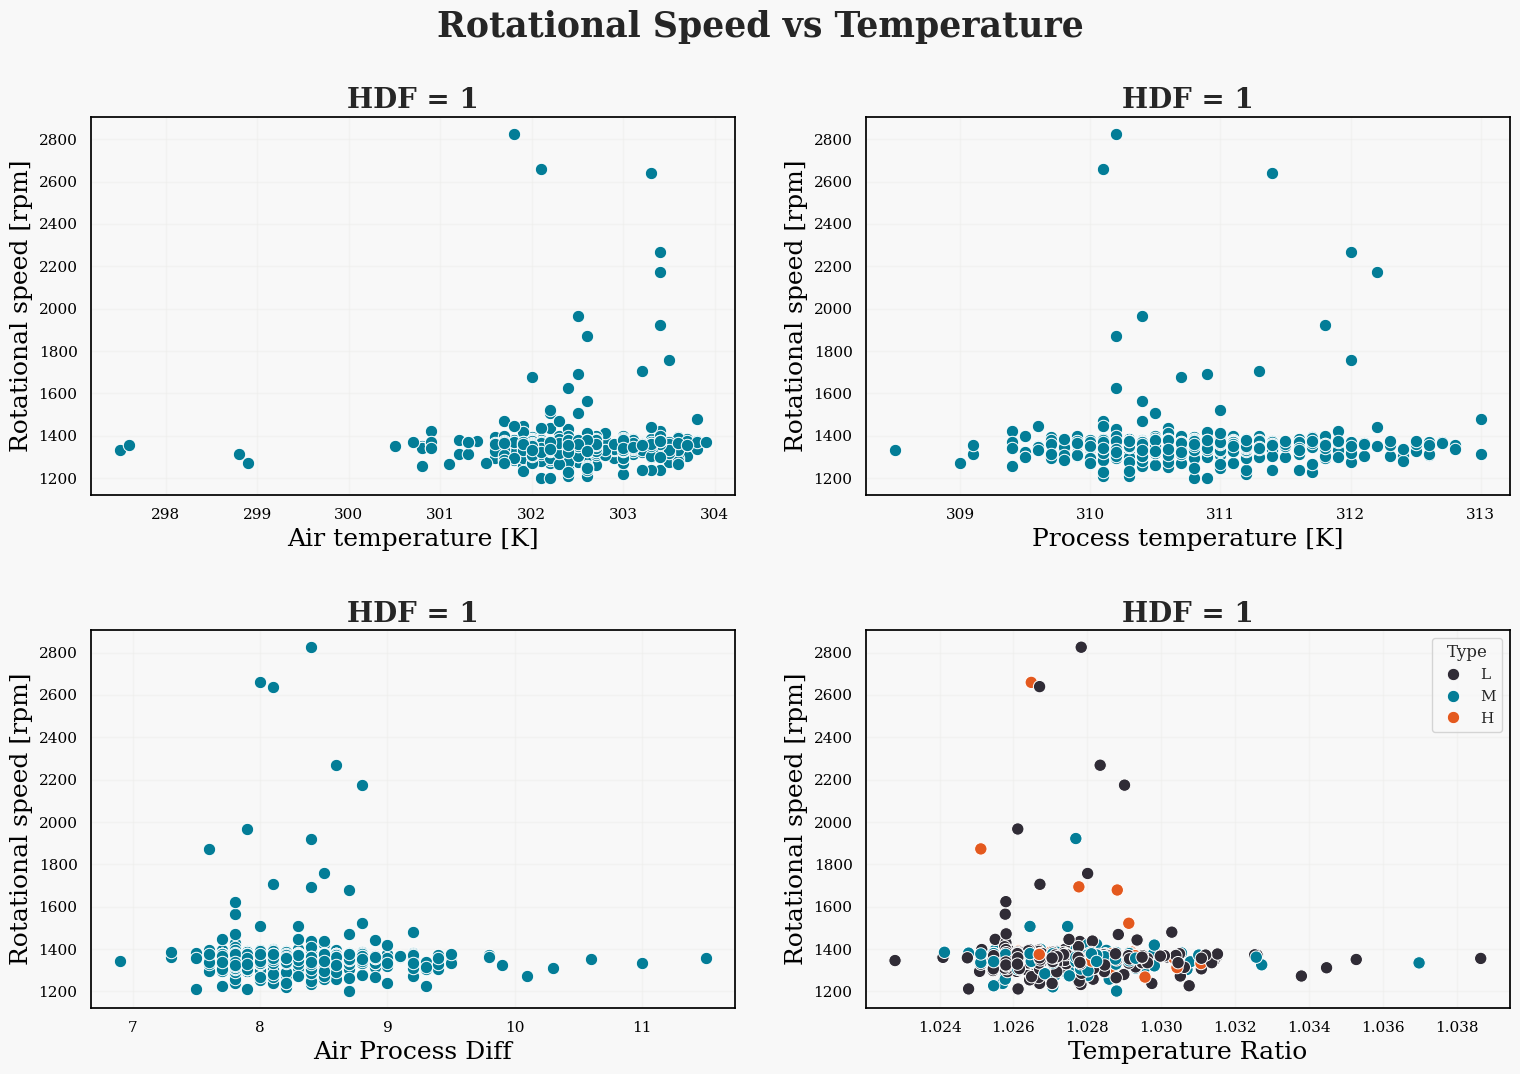

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df[df['HDF'] == 1], x='Air temperature [K]', y='Rotational speed [rpm]',
                color='#037d97', ax=axes[0, 0], s=80)
axes[0, 0].set_title('HDF = 1', fontsize=20, fontweight='bold')
axes[0, 0].set_xlabel('Air temperature [K]', fontsize=18)
axes[0, 0].set_ylabel('Rotational speed [rpm]', fontsize=18)

sns.scatterplot(data=df[df['HDF'] == 1], x='Process temperature [K]', y='Rotational speed [rpm]',
                color='#037d97', ax=axes[0, 1], s=80)
axes[0, 1].set_title('HDF = 1', fontsize=20, fontweight='bold')
axes[0, 1].set_xlabel('Process temperature [K]', fontsize=18)
axes[0, 1].set_ylabel('Rotational speed [rpm]', fontsize=18)

sns.scatterplot(data=df[df['HDF'] == 1], x='air_process_diff', y='Rotational speed [rpm]',
                color='#037d97', ax=axes[1, 0], s=80)
axes[1, 0].set_title('HDF = 1', fontsize=20, fontweight='bold')
axes[1, 0].set_xlabel('Air Process Diff', fontsize=18)
axes[1, 0].set_ylabel('Rotational speed [rpm]', fontsize=18)

sns.scatterplot(data=df[df['HDF'] == 1], x='temp_ratio', y='Rotational speed [rpm]',
                color='#037d97', ax=axes[1, 1], s=80, hue='Type', palette=palette)
axes[1, 1].set_title('HDF = 1', fontsize=20, fontweight='bold')
axes[1, 1].set_xlabel('Temperature Ratio', fontsize=18)
axes[1, 1].set_ylabel('Rotational speed [rpm]', fontsize=18)

fig.suptitle(f'Rotational Speed vs Temperature\n', ha='center', fontweight='bold', fontsize=25, y=0.92)

plt.tight_layout(pad=3)
plt.show()

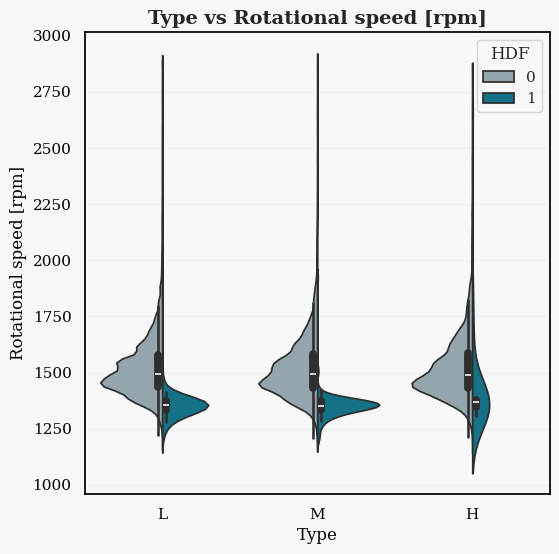

ANOVA Test Results:
F-statistic: 0.5726432601386056
p-value: 0.5640339374004131

There is no significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.

Levene's Test Results:
Test statistic: 17.978682152874903
p-value: 1.55950344615656e-08

There is evidence of a significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.


In [ ]:
df_hdf = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'HDF']]

plt.figure(figsize=(6, 6))
sns.violinplot(data=df_hdf, x='Type', y='Rotational speed [rpm]', hue='HDF', split=True, palette=c)
plt.title('Type vs Rotational speed [rpm]', fontsize=14, fontweight='bold')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Rotational speed [rpm]', fontsize=12)
plt.legend(title='HDF', loc='upper right')
plt.show()

# one-way ANOVA
result_anova = stats.f_oneway(*(df_hdf[df_hdf['Type'] == t]['Rotational speed [rpm]'] for t in df_hdf['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.")
print()

# Levene's test 
result_levene = stats.levene(*(df_hdf[df_hdf['Type'] == t]['Rotational speed [rpm]'] for t in df_hdf['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.")

C:\Users\user\AppData\Local\Temp\ipykernel_12632\97149487.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\97149487.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\97149487.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\97149487.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=data, ax=ax[i], palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_12632\97149487.py:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
 

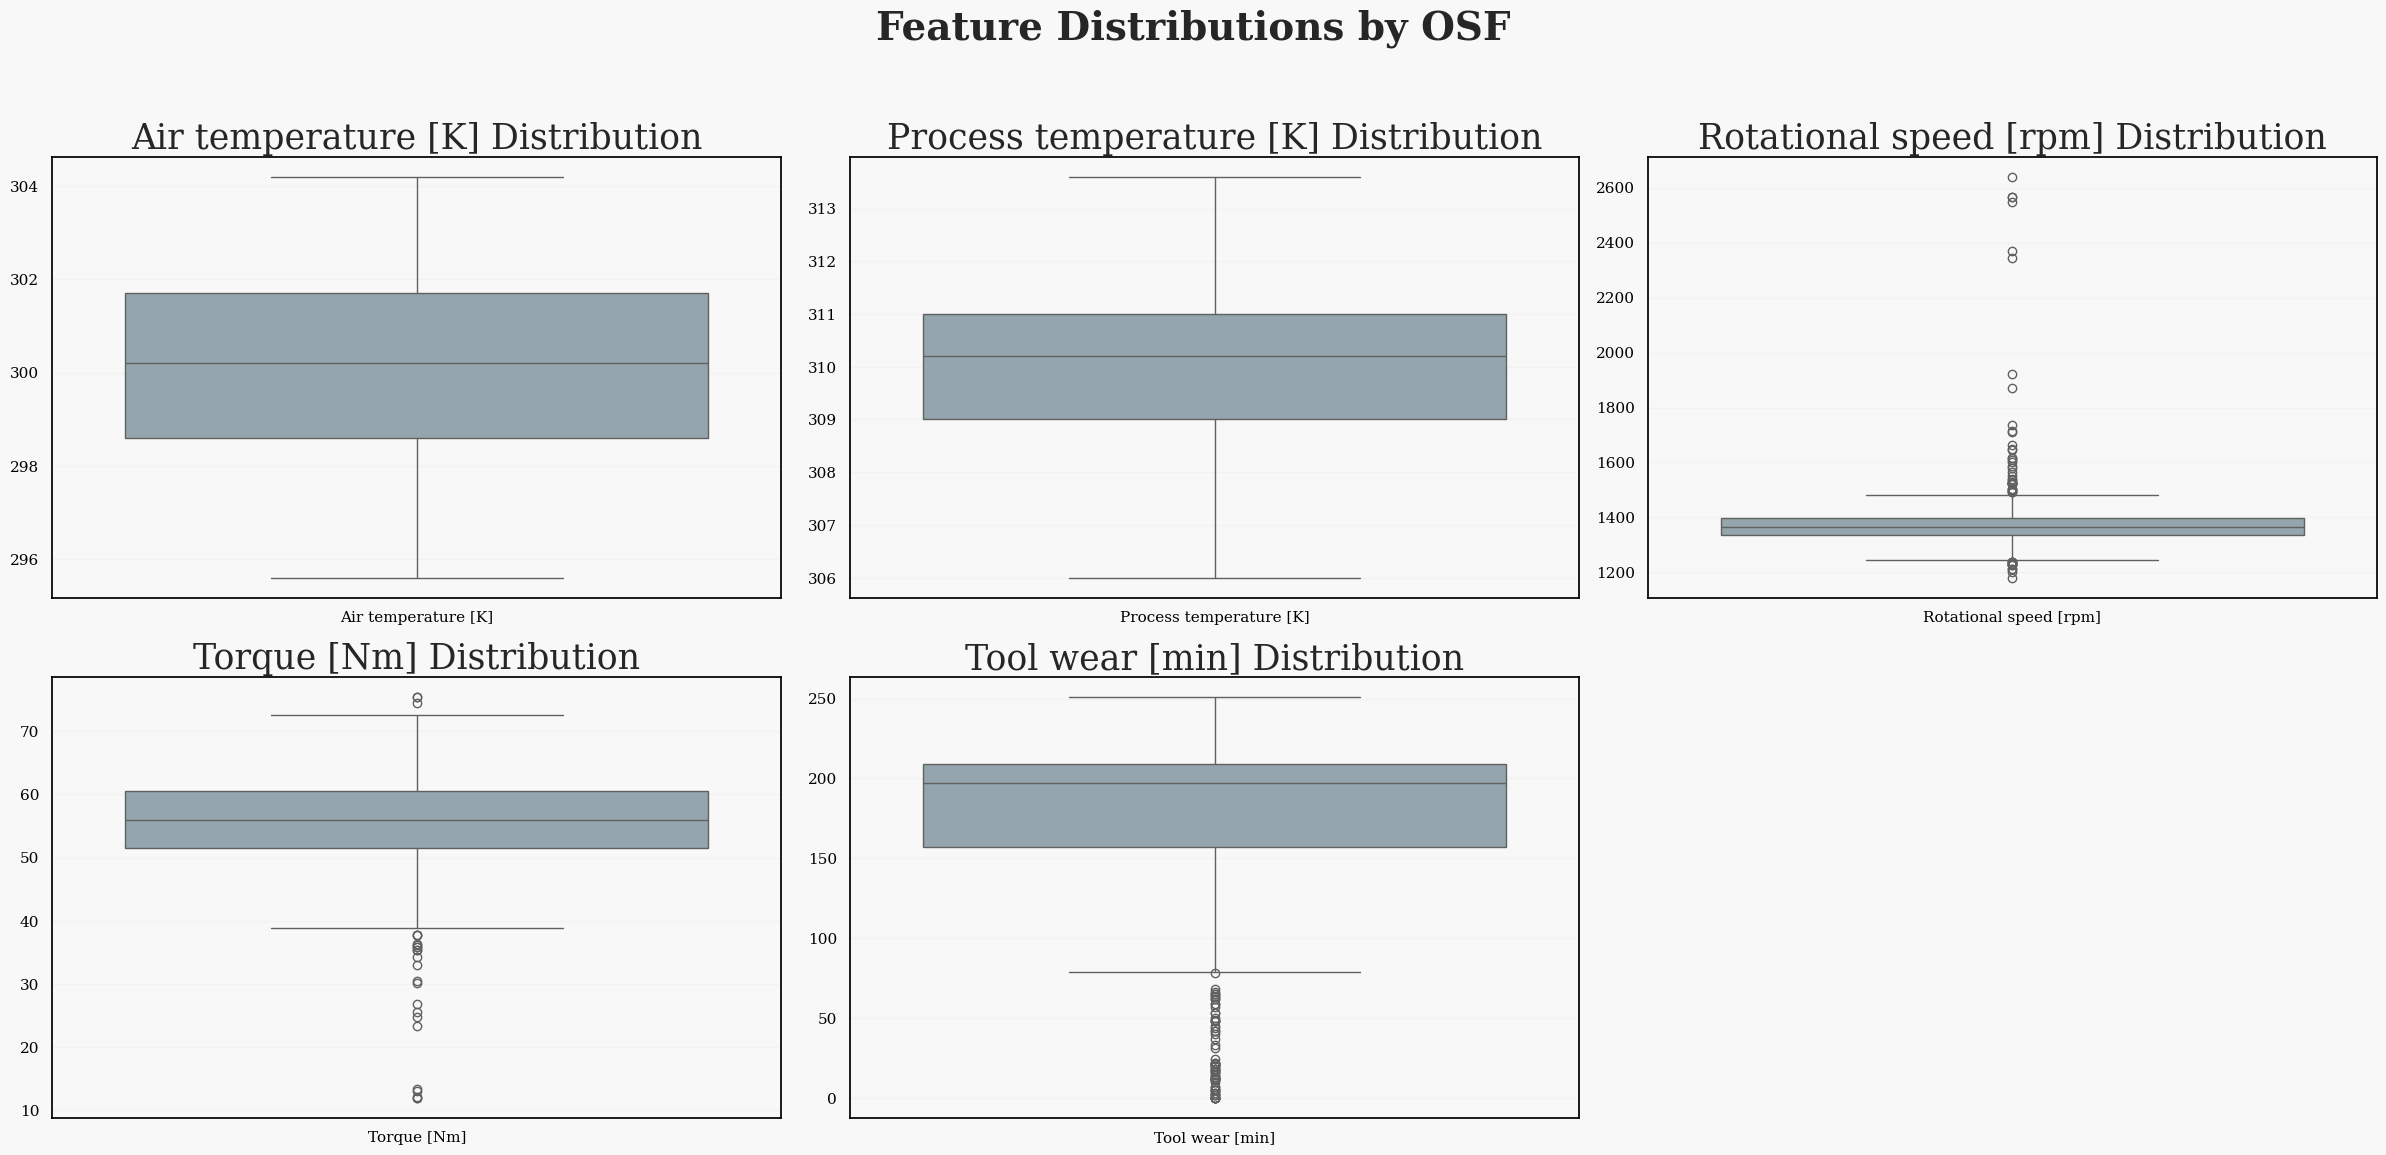

In [ ]:
features = [f for f in df.columns if f in num_cols]
columns = features
n_rows = len(columns) // 3
if len(columns) % 3:
    n_rows += 1

fig, ax = plt.subplots(n_rows, 3, figsize=(24, 6 * n_rows))
ax = ax.ravel()

unique_target = df['OSF'].unique()
n_categories = len(unique_target)
colors = sns.color_palette(c, n_categories)

for i, column in enumerate(columns):
    data = [df[df['OSF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i], palette=colors)
  
    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=25)
    ax[i].set_xlabel(None, fontsize=20)
    ax[i].set_ylabel(None, fontsize=20)

for i in range(len(columns), len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Feature Distributions by OSF\n\n', ha='center', fontweight='bold', fontsize=28, y=0.96)
plt.tight_layout(pad=1.0)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\3766382953.py:18: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=filtered_data, x='Tool wear [min]', y='Torque [Nm]', hue='Type',


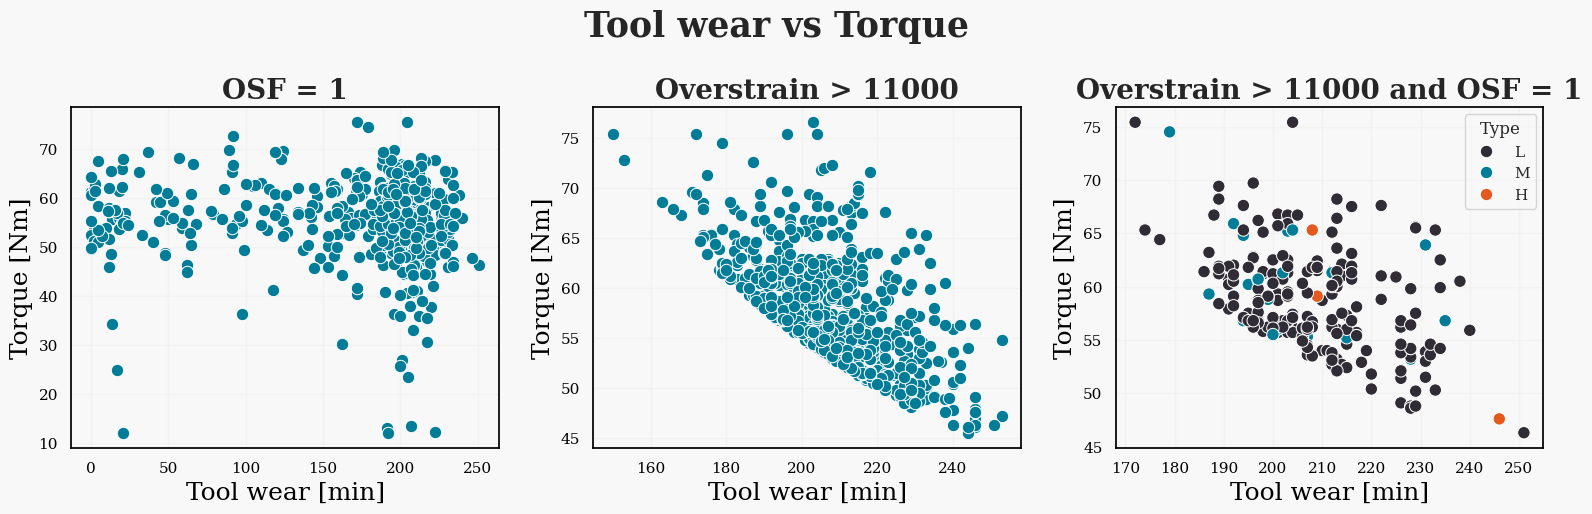

In [ ]:
df['overstrain'] = (df['Torque [Nm]'] * df['Tool wear [min]'])

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.scatterplot(data=df[df['OSF'] == 1], x='Tool wear [min]', y='Torque [Nm]',
                color='#037d97', ax=axes[0], s=80)
axes[0].set_title('OSF = 1', fontsize=20, fontweight='bold')
axes[0].set_xlabel('Tool wear [min]', fontsize=18)
axes[0].set_ylabel('Torque [Nm]', fontsize=18)

sns.scatterplot(data=df[df['overstrain'] > 11000], x='Tool wear [min]', y='Torque [Nm]',
                color='#037d97', ax=axes[1], s=80)
axes[1].set_title('Overstrain > 11000', fontsize=20, fontweight='bold')
axes[1].set_xlabel('Tool wear [min]', fontsize=18)
axes[1].set_ylabel('Torque [Nm]', fontsize=18)

filtered_data = df[(df['overstrain'] > 11000) & (df['OSF'] == 1)]
sns.scatterplot(data=filtered_data, x='Tool wear [min]', y='Torque [Nm]', hue='Type',
                palette=palette, ax=axes[2], s=80)
axes[2].set_title('Overstrain > 11000 and OSF = 1', fontsize=20, fontweight='bold')
axes[2].set_xlabel('Tool wear [min]', fontsize=18)
axes[2].set_ylabel('Torque [Nm]', fontsize=18)

fig.suptitle(f'Tool wear vs Torque\n', ha='center', fontweight='bold', fontsize=25, y=0.88)

plt.tight_layout(pad=2.0)
plt.show()

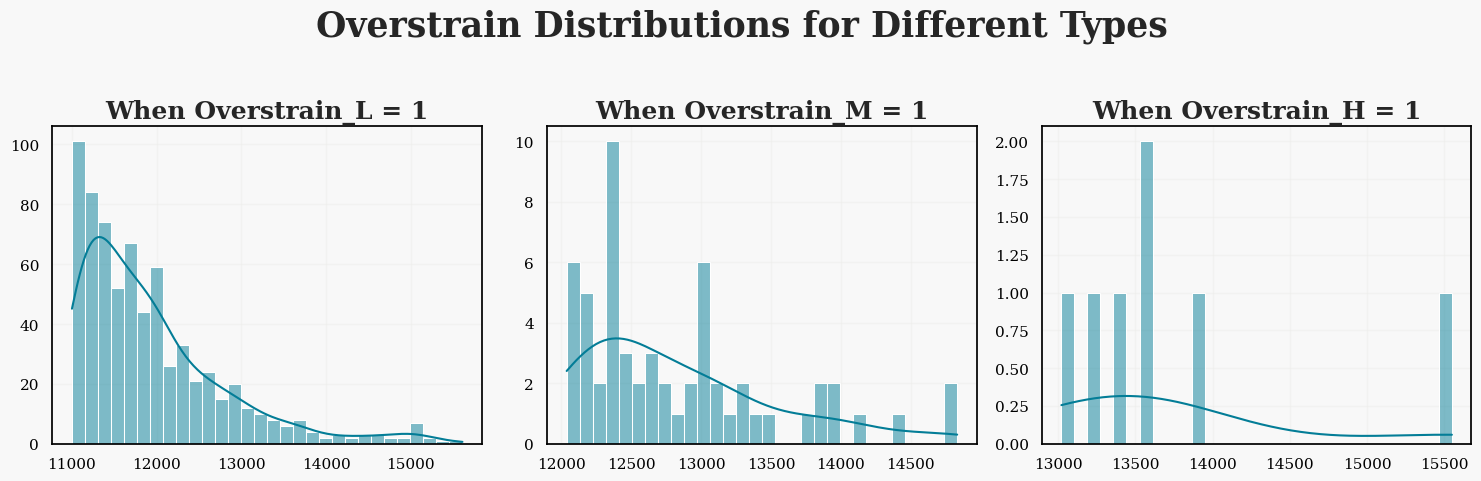

In [ ]:
df_copy = df.copy()

df_copy['overstrain_L'] = ((df_copy['overstrain'] > 11000) & (df_copy['Type'] == 'L')).astype(int)
df_copy['overstrain_M'] = ((df_copy['overstrain'] > 12000) & (df_copy['Type'] == 'M')).astype(int)
df_copy['overstrain_H'] = ((df_copy['overstrain'] > 13000) & (df_copy['Type'] == 'H')).astype(int)

fig = plt.figure(figsize=(15, 5))

# overstrain_L = 1
plt.subplot(1, 3, 1)
sns.histplot(df_copy.loc[df_copy['overstrain_L'] == 1, 'overstrain'], bins=30, kde=True, color='#037d97')
plt.title('When Overstrain_L = 1', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

# overstrain_M = 1
plt.subplot(1, 3, 2)
sns.histplot(df_copy.loc[df_copy['overstrain_M'] == 1, 'overstrain'], bins=30, kde=True, color='#037d97')
plt.title('When Overstrain_M = 1', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

# overstrain_H = 1
plt.subplot(1, 3, 3)
sns.histplot(df_copy.loc[df_copy['overstrain_H'] == 1, 'overstrain'], bins=30, kde=True, color='#037d97')
plt.title('When Overstrain_H = 1', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

fig.suptitle(f'Overstrain Distributions for Different Types\n', ha='center', fontweight='bold', fontsize=25, y=0.96)

plt.tight_layout()
plt.show()

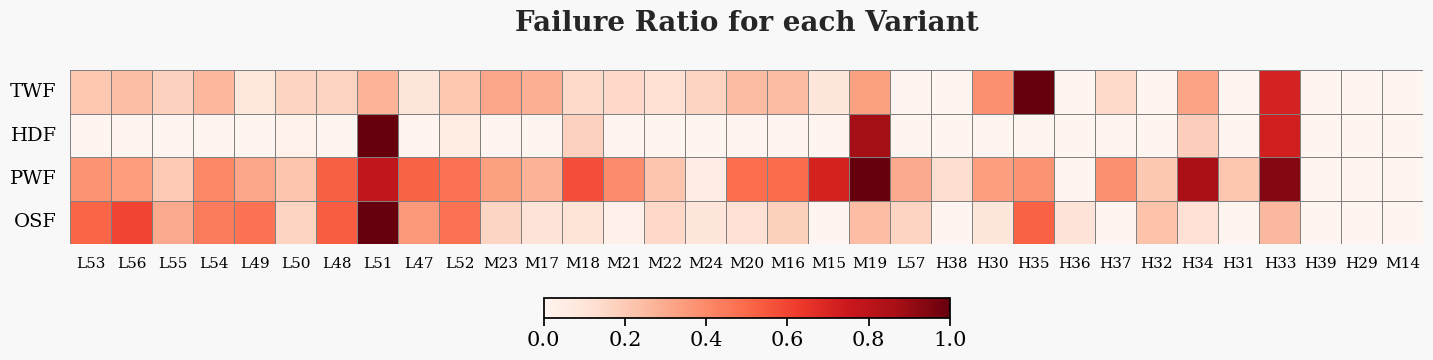

In [ ]:
from matplotlib import colors

df['Product Variant'] = df['Product ID'].astype(str).str[:3]
failure_types = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']

group_product = df['Product Variant'].value_counts().reset_index()
group_product.columns = ['Product Variant', 'Count']

for fail in failure_types:
    
    # Sum the failures by product variant
    temp = df.groupby('Product Variant')[fail].sum().reset_index()
    group_product = pd.merge(group_product, temp, on='Product Variant')
    
    # Calculate failure ratio
    group_product[fail + '_ratio'] = (group_product[fail] / group_product['Count'])*100

scaler = MinMaxScaler()
heatmap_failure = group_product.set_index('Product Variant')[['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']]

ratio_cols = ['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']
heatmap_scaled = heatmap_failure.copy()
heatmap_scaled[ratio_cols] = scaler.fit_transform(heatmap_failure[ratio_cols])

heatmap_df_scaled_plot = heatmap_scaled.copy()
heatmap_df_scaled_plot.columns = ['TWF', 'HDF', 'PWF', 'OSF']

fig, ax = plt.subplots(figsize=(14.5,3.7))

cmap = colors.ListedColormap(sns.color_palette("Reds", 256))
norm = colors.Normalize(vmin=0, vmax=1)

sns.heatmap(heatmap_df_scaled_plot.T, cmap=cmap, norm=norm, cbar=False, ax=ax, linecolor='grey', linewidth='0.5')
ax.set_title('Failure Ratio for each Variant\n', weight='bold', fontsize=20)
ax.set_xlabel('', weight='bold')
ax.set_ylabel('', weight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=14)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,
                    orientation='horizontal', pad=0.2, shrink=0.3)
cbar.set_label('', weight='bold')
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12632\1507072241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='unknown_ratio', y='Product Variant', data=group_product_u,


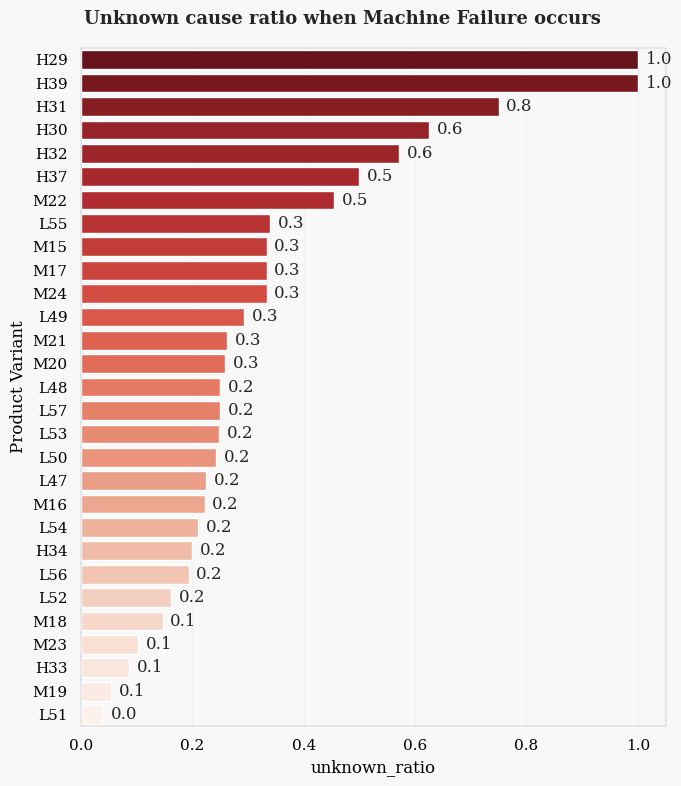

In [ ]:
group_product['unknown'] = group_product['Machine failure'] - (group_product['TWF'] + group_product['HDF'] + group_product['PWF'] + group_product['OSF'])
group_product['sum_causes']  = group_product['TWF'] + group_product['HDF'] + group_product['PWF'] + group_product['OSF']
group_product['unknown_ratio'] = group_product['unknown'] / group_product['Machine failure']
group_product['unknown_ratio'] = group_product['unknown_ratio'].apply(lambda x: 0 if pd.isnull(x) or x < 0 else x)

group_product_u = group_product[group_product['unknown_ratio'] > 0]
group_product_u = group_product_u.sort_values('unknown_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(7,8))
bar_plot = sns.barplot(x='unknown_ratio', y='Product Variant', data=group_product_u,
                       palette='Reds_r', ax=ax)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.1f'),
                      (p.get_width(), p.get_y()+p.get_height()/2.),
                      ha = 'center', va = 'center',
                      xytext = (15, 0),
                      textcoords = 'offset points')

for spine in ax.spines.values():
    spine.set_linewidth(0.1)
    
fig.suptitle(f'Unknown cause ratio when Machine Failure occurs', ha='center', fontweight='bold', fontsize=13, y=0.98)
plt.tight_layout()
plt.show()